In [1]:
import json,os
import hillmodel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_and_plot_hill(fname,ymax):
    whole_dict = json.load(open(fname))
    param_samp_dict = whole_dict['Parameter']
    network_spec = whole_dict["Network"]
    hill_exponent = whole_dict["Hill Exponent"]
    init_cond = whole_dict["Traces"][0]
    init_time = whole_dict["Time"][0]
    end_time = whole_dict["Time"][-1]
    timestep = whole_dict["Time"][1] - whole_dict["Time"][0]
    model = hillmodel.hillmodel(network_spec, param_samp_dict, hill_exponent)
    times, timeseries, nodes = model.simulateHillModel(init_cond,init_time,end_time,timestep)
    model.plotResults(times,timeseries,savename=savename,labeloptions={'xlabel' : 'Time','ylabel' : 'Expression','fontsize':'14'},legendoptions={'loc':'upper left', 'bbox_to_anchor':(1, 1)},axisoptions={'ylim' : [-0.2,ymax]})
    return times, param_samp_dict,init_cond,hill_exponent,init_time,end_time,timestep


def drop_D(param_samp_dict,init_cond,hill_exponent,init_time,end_time,timestep,ymax):
    no_D_net_spec = "A : (F) : E\nB : (C) : E\nC : (A + E) : E\nE : (F)(~B) : E\nF : (~B) : E\n"
    no_D_param_samp_dict = {k:v for k,v in param_samp_dict.items() if "D" not in k}
    no_D_init_cond = init_cond[:3] + init_cond[4:]
    no_D_model = hillmodel.hillmodel(no_D_net_spec, no_D_param_samp_dict, hill_exponent)
    no_D_times, no_D_timeseries, no_D_nodes = no_D_model.simulateHillModel(no_D_init_cond,init_time,end_time,timestep)
    no_D_model.plotResults(no_D_times,no_D_timeseries,savename=savename_no_D,skipindex=3,labeloptions={'xlabel' : 'Time','ylabel' : 'Expression','fontsize':'14'},legendoptions={'loc':'upper left', 'bbox_to_anchor':(1, 1)},axisoptions={'ylim' : [-0.2,ymax]})


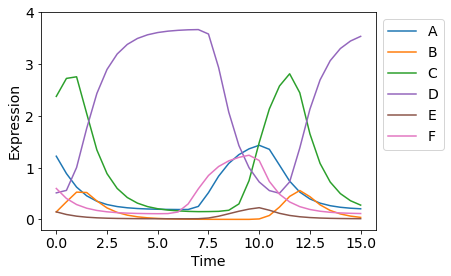

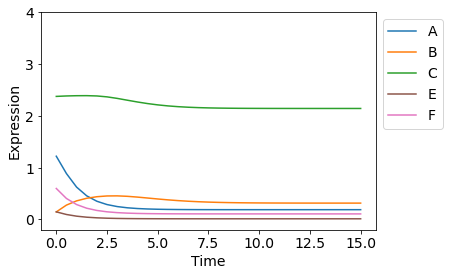

In [3]:
fname = "syn_net_6D_20191104_initial_data_run/syn_net_6D_20191104_a_hillmodel_p270.json"
savename = "figures/syn_net_p270_data.pdf"
savename_no_D = "figures/syn_net_p270_data_no_D.pdf"
ymax = 4

times, param_samp_dict,init_cond,hill_exponent,init_time,end_time,timestep = gen_and_plot_hill(fname,ymax)

drop_D(param_samp_dict,init_cond,hill_exponent,init_time,end_time,timestep,ymax)



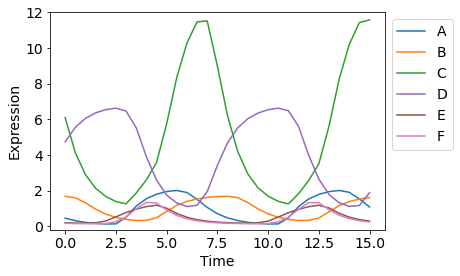

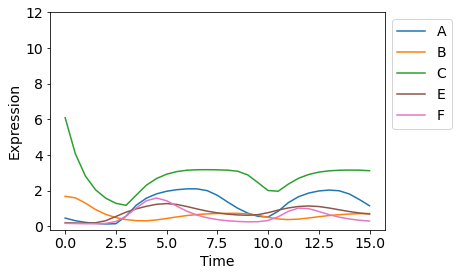

In [4]:
fname = "syn_net_6D_20191104_initial_data_run/syn_net_6D_20191104_a_hillmodel_p779.json"
savename = "figures/syn_net_p779_data.pdf"
savename_no_D = "figures/syn_net_p779_data_no_D.pdf"
ymax = 12

times, param_samp_dict,init_cond,hill_exponent,init_time,end_time,timestep = gen_and_plot_hill(fname,ymax)

drop_D(param_samp_dict,init_cond,hill_exponent,init_time,end_time,timestep,ymax)


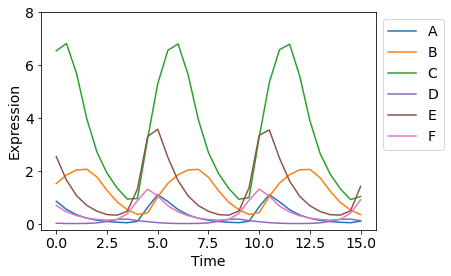

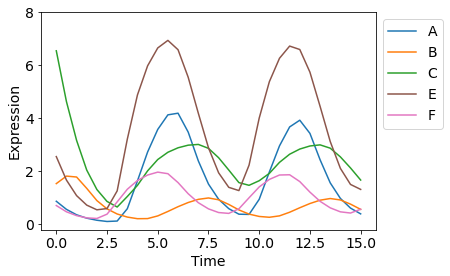

In [5]:
fname = "syn_net_6D_20191104_initial_data_run/syn_net_6D_20191104_a_hillmodel_p1945.json"
savename = "figures/syn_net_p1945_data.pdf"
savename_no_D = "figures/syn_net_p1945_data_no_D.pdf"
ymax = 8

times, param_samp_dict,init_cond,hill_exponent,init_time,end_time,timestep = gen_and_plot_hill(fname,ymax)

drop_D(param_samp_dict,init_cond,hill_exponent,init_time,end_time,timestep,ymax)

In [6]:
# Create true negative
x = np.asarray(times)
G = 2*(np.sin(9/(2*np.pi)*x)+1)
legendoptions={'loc':'upper left', 'bbox_to_anchor':(1, 1)}
plt.plot(x,G)
plt.legend(["G"],**legendoptions)
plt.xlabel("Time")
plt.ylabel("Expression")
plt.savefig("figures/G.pdf", bbox_inches='tight')
plt.show()